## Thresholding

### 1. Simple thresholding: 
- For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding.

### 2. Adaptive thresholding:
- In the simple thresholding, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas.

- Adaptive thresholding algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

Reference: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html



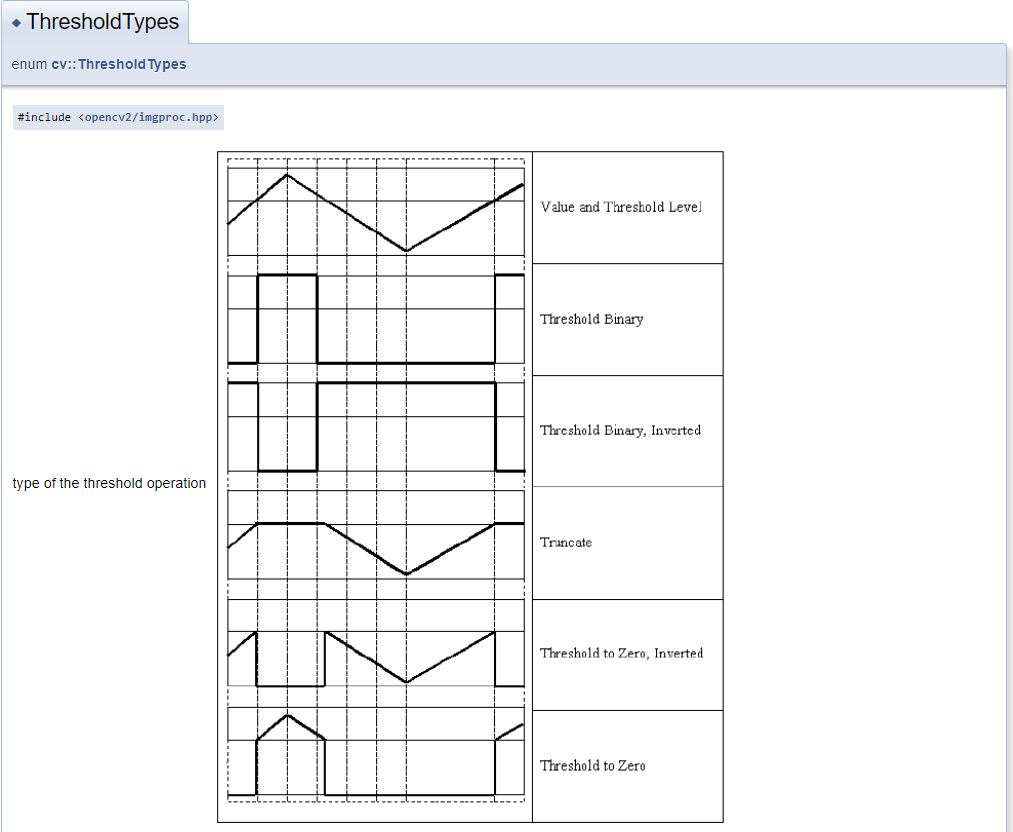

Reference: https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59


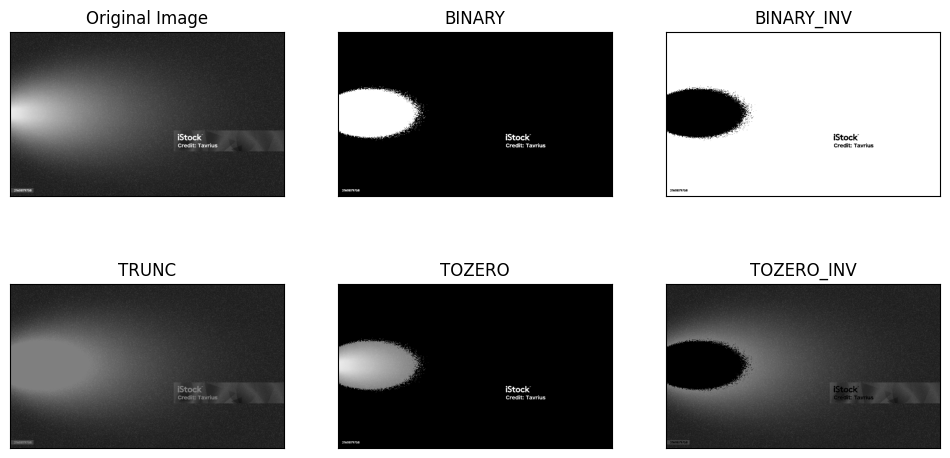

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

# Input your image!
img = cv.imread('./assets/gradient.jpg', cv.IMREAD_GRAYSCALE)

threshold = 127
# print(img)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,threshold,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,threshold,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

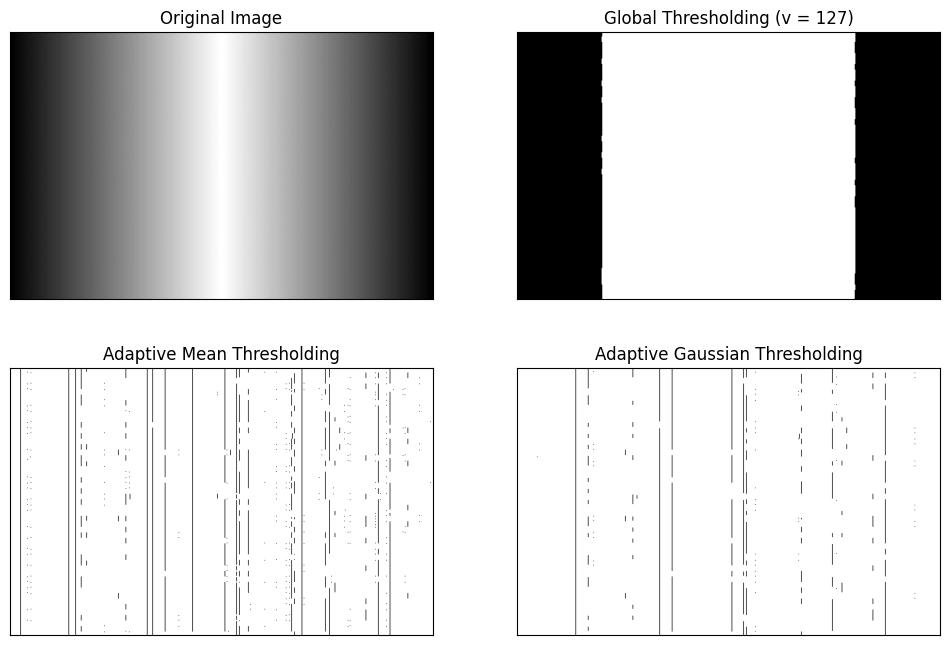

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8)) 
img = cv.imread('./assets/gradient_2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel:11 here.
# C: Constant subtracted from the mean or weighted mean (2 in our case). Normally, it is positive but may be zero or negative as well.

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,3,1)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,3,1)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Binarization

### How it works??
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

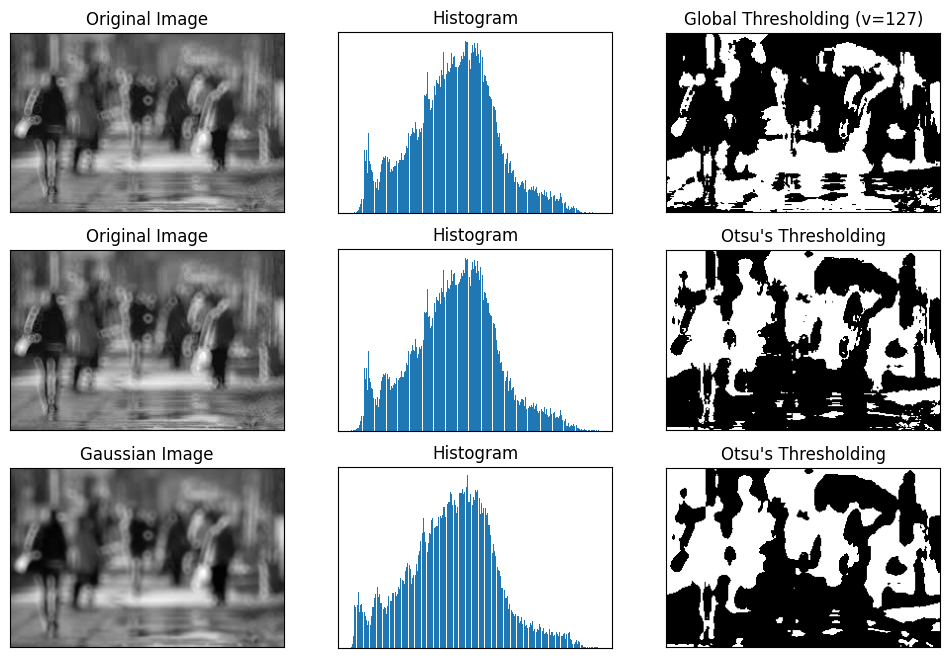

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8)) 
img = cv.imread('./assets/blur.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Image','Histogram','Global Thresholding (v=127)',
          'Original Image','Histogram',"Otsu's Thresholding",
          'Gaussian Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Task: (10 points)

#### 1. Read an image and apply global, adaptive, and Otsu's thresholding.
#### 2. Visualize the results.

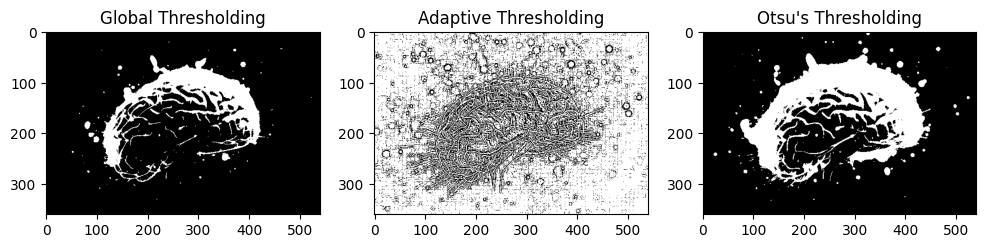

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image in grayscale
img = cv2.imread('assets/brain.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply global thresholding
threshold = 127
ret1, thresh_global = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)  # Fill the missing values

# Step 3: Apply adaptive thresholding
thresh_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 1)

# Step 4: Apply Otsu's thresholding
ret2, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Visualize the images
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(thresh_global, cmap='gray'), plt.title('Global Thresholding')
plt.subplot(132), plt.imshow(thresh_adaptive, cmap='gray'), plt.title('Adaptive Thresholding')
plt.subplot(133), plt.imshow(thresh_otsu, cmap='gray'), plt.title('Otsu\'s Thresholding')
plt.show()

